<a href="https://colab.research.google.com/github/bhushanbkt/Surface-Crack-Detection/blob/main/Surface_Crack_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# !pip install dataset-tools

In [1]:
# pip install --upgrade dataset-tools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.9/140.9 kB 10.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.5/398.5 kB 39.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

Data loading

In [6]:
pip install urllib3==1.26.15

In [1]:
import dataset_tools as dtools

In [3]:
# import dataset_tools as dtools

# dtools.download(dataset='Concrete Crack Segmentation', dst_dir='/content/drive/MyDrive/Dataset/dataset-ninja/')

Unpacking 'concrete-crack-segmentation.tar': 100%|██████████| 919/919 [00:16<00:00, 55.72file/s]


'/content/drive/MyDrive/Dataset/dataset-ninja/concrete-crack-segmentation'

EDA

In [2]:
import os

# Set the paths to the image and annotation folders
image_folder = '/content/drive/MyDrive/Dataset/dataset-ninja/concrete-crack-segmentation/ds/img'
annotation_folder = '/content/drive/MyDrive/Dataset/dataset-ninja/concrete-crack-segmentation/ds/ann'

# List all files in the image folder
image_files = os.listdir(image_folder)

# List all files in the annotation folder
annotation_files = os.listdir(annotation_folder)

# Display the counts
print(f"Number of images in the dataset: {len(image_files)}")
print(f"Number of annotation files in the dataset: {len(annotation_files)}")


Number of images in the dataset: 458
Number of annotation files in the dataset: 458


In [20]:
import os
import json
from PIL import Image, ImageDraw
for img_filename in os.listdir(img_folder):
    if img_filename.endswith('.jpg'):
        img_path = os.path.join(img_folder, img_filename)
        annotation_filename = img_filename.replace('.jpg', '.jpg.json')
        annotation_path = os.path.join(annotation_folder, annotation_filename)

        print(f"Processing image: {img_path}, annotation: {annotation_path}")

        # Rest of your code...

root_folder = '/content/drive/MyDrive/Dataset/dataset-ninja/concrete-crack-segmentation'

# Load meta.json
meta_path = os.path.join(root_folder, 'meta.json')
with open(meta_path, 'r') as meta_file:
    meta_data = json.load(meta_file)

# Get classes information
classes = meta_data.get('classes', [])

# Iterate over images in ds/img/ folder
img_folder = os.path.join(root_folder, 'ds', 'img')
annotation_folder = os.path.join(root_folder, 'ds', 'annotation')

for img_filename in os.listdir(img_folder):
    if img_filename.endswith('.jpg'):
        img_path = os.path.join(img_folder, img_filename)

        # Load the corresponding annotation file
        annotation_filename = img_filename.replace('.jpg', '.jpg.json')
        annotation_path = os.path.join(annotation_folder, annotation_filename)

        # Check if the annotation file exists
        if os.path.exists(annotation_path):
            # Load JSON annotation file
            with open(annotation_path, 'r') as annotation_file:
                annotation_data = json.load(annotation_file)

            # Load image
            image = Image.open(img_path)

            # Create a drawing object
            draw = ImageDraw.Draw(image)

            # Extract information from the annotation file and draw on the image
            for annotation in annotation_data:
                class_id = annotation.get('classID', 0)
                class_info = next((c for c in classes if c.get('id') == class_id), {})

                bbox = annotation.get('bbox', [])
                if class_info and bbox:
                    # Assuming the annotation contains information like bounding box coordinates
                    draw.rectangle(bbox, outline=class_info.get('color', 'red'), width=2)

                    # You can add more drawing or text annotations based on your JSON structure

            # Show or save the annotated image
            image.show()  # or image.save('path/to/save/annotated/image.jpg')


Processing image: /content/drive/MyDrive/Dataset/dataset-ninja/concrete-crack-segmentation/ds/img/196.jpg, annotation: /content/drive/MyDrive/Dataset/dataset-ninja/concrete-crack-segmentation/ds/annotation/196.jpg.json
Processing image: /content/drive/MyDrive/Dataset/dataset-ninja/concrete-crack-segmentation/ds/img/082.jpg, annotation: /content/drive/MyDrive/Dataset/dataset-ninja/concrete-crack-segmentation/ds/annotation/082.jpg.json
Processing image: /content/drive/MyDrive/Dataset/dataset-ninja/concrete-crack-segmentation/ds/img/116.jpg, annotation: /content/drive/MyDrive/Dataset/dataset-ninja/concrete-crack-segmentation/ds/annotation/116.jpg.json
Processing image: /content/drive/MyDrive/Dataset/dataset-ninja/concrete-crack-segmentation/ds/img/245.jpg, annotation: /content/drive/MyDrive/Dataset/dataset-ninja/concrete-crack-segmentation/ds/annotation/245.jpg.json
Processing image: /content/drive/MyDrive/Dataset/dataset-ninja/concrete-crack-segmentation/ds/img/120.jpg, annotation: /cont

In [10]:
import os

# Set the paths to the image and annotation folders
image_folder = '/content/drive/MyDrive/Dataset/dataset-ninja/concrete-crack-segmentation/ds/img'
annotation_folder = '/content/drive/MyDrive/Dataset/dataset-ninja/concrete-crack-segmentation/ds/ann'

# List all files in the image folder
image_files = os.listdir(image_folder)

# List all files in the annotation folder
annotation_files = os.listdir(annotation_folder)

# Display the first three annotation files and their corresponding image files
num_samples_to_display = 3

for i in range(num_samples_to_display):
    annotation_file = annotation_files[i]
    image_file = annotation_file.replace('_mask.png', '.jpg')

    annotation_path = os.path.join(annotation_folder, annotation_file)
    image_path = os.path.join(image_folder, image_file)

    print(f"Sample {i+1}:")
    print(f"  Annotation: {annotation_file}")
    print(f"  Image: {image_file}")
    print(f"  Annotation Path: {annotation_path}")
    print(f"  Image Path: {image_path}")
    print()


Sample 1:
  Annotation: 517.JPG.json
  Image: 517.JPG.json
  Annotation Path: /content/drive/MyDrive/Dataset/dataset-ninja/concrete-crack-segmentation/ds/ann/517.JPG.json
  Image Path: /content/drive/MyDrive/Dataset/dataset-ninja/concrete-crack-segmentation/ds/img/517.JPG.json

Sample 2:
  Annotation: 250.jpg.json
  Image: 250.jpg.json
  Annotation Path: /content/drive/MyDrive/Dataset/dataset-ninja/concrete-crack-segmentation/ds/ann/250.jpg.json
  Image Path: /content/drive/MyDrive/Dataset/dataset-ninja/concrete-crack-segmentation/ds/img/250.jpg.json

Sample 3:
  Annotation: 504.JPG.json
  Image: 504.JPG.json
  Annotation Path: /content/drive/MyDrive/Dataset/dataset-ninja/concrete-crack-segmentation/ds/ann/504.JPG.json
  Image Path: /content/drive/MyDrive/Dataset/dataset-ninja/concrete-crack-segmentation/ds/img/504.JPG.json



Number of files in the dataset: 458


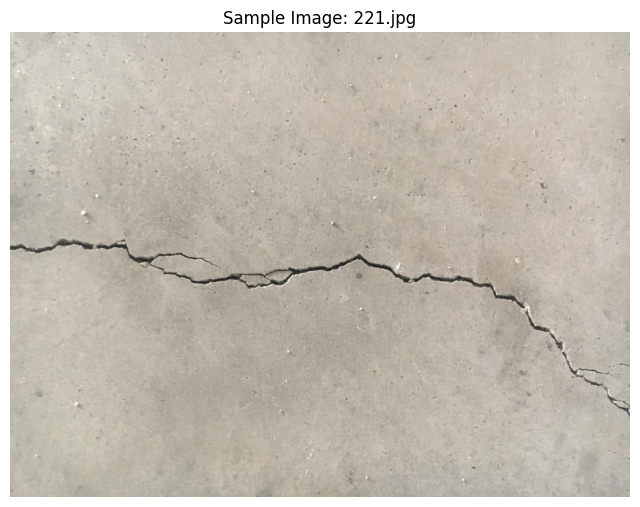

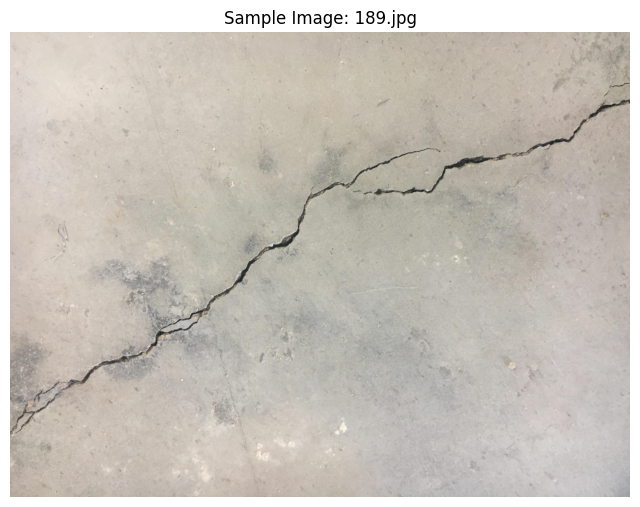

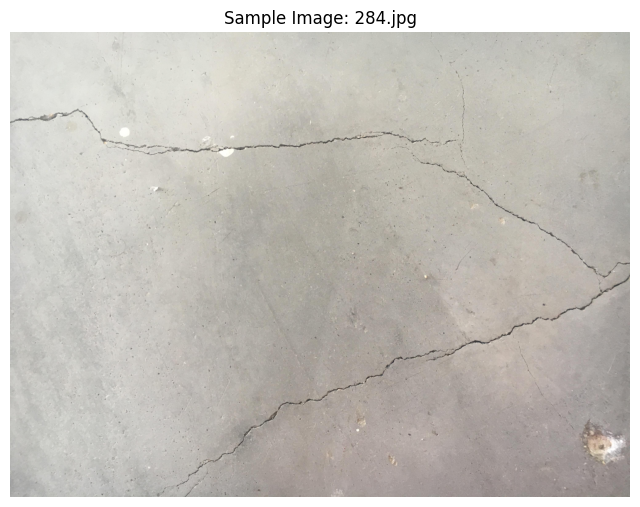

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Set the path to the dataset directory
dataset_dir = '/content/drive/MyDrive/Dataset/dataset-ninja/concrete-crack-segmentation/ds/img'

# List all files in the dataset directory
file_list = os.listdir(dataset_dir)

# Display basic information about the dataset
print(f"Number of files in the dataset: {len(file_list)}")

# Let's visualize a few random samples
num_samples_to_display = 3

for _ in range(num_samples_to_display):
    # Choose a random file from the dataset
    random_file = np.random.choice(file_list)

    # Read the image
    image_path = os.path.join(dataset_dir, random_file)
    image = cv2.imread(image_path)

    # Display the image
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Sample Image: {random_file}")
    plt.axis('off')
    plt.show()


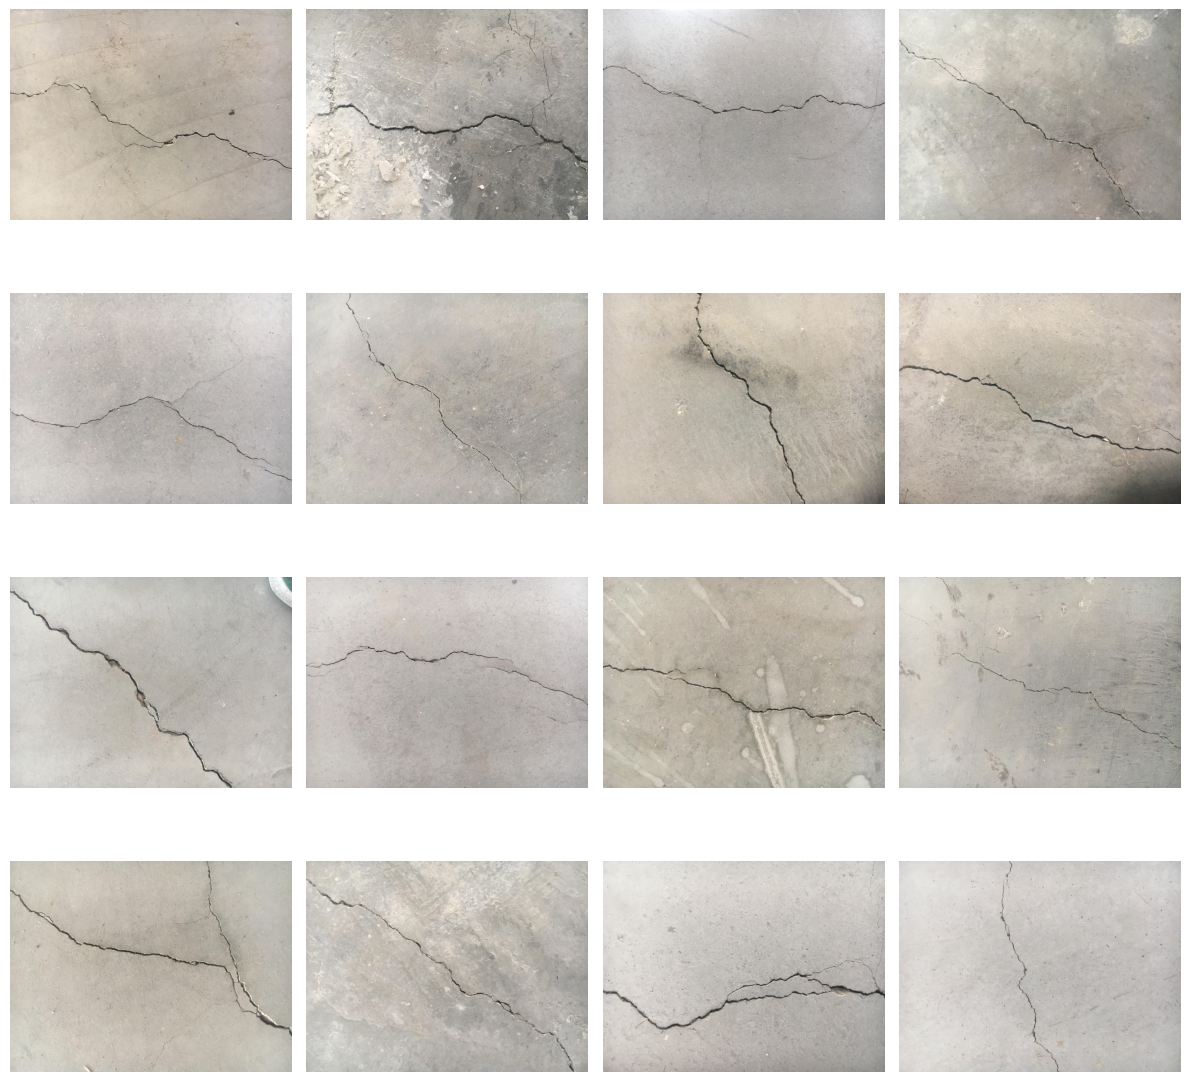

In [23]:
import os
import cv2
import matplotlib.pyplot as plt

# Path to the folder containing images
image_folder = '/content/drive/MyDrive/Dataset/dataset-ninja/concrete-crack-segmentation/ds/img'

# Get a list of image file names
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Number of rows and columns for subplots
rows = 4
cols = 4

# Create subplots
fig, axs = plt.subplots(rows, cols, figsize=(12, 12))

# Iterate over the images and display them in subplots
for i in range(rows):
    for j in range(cols):
        # Read the image
        img_path = os.path.join(image_folder, image_files[i * cols + j])
        img = cv2.imread(img_path)

        # Convert BGR to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Display the image
        axs[i, j].imshow(img)
        axs[i, j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


In [13]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Path to the folder containing images
image_folder = '/content/drive/MyDrive/Dataset/dataset-ninja/concrete-crack-segmentation/ds/img'

# Get a list of image file names
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

# List to store image dimensions
image_dimensions = []

# Collect image dimensions
for image_file in image_files:
    img_path = os.path.join(image_folder, image_file)
    img = cv2.imread(img_path)
    heights, widths, _ = img.shape
    image_dimensions.append((height, width))


# Print basic statistics
print("Basic Statistics:")
print(f"Total number of images: {len(image_files)}")
print(f"Average image height: {np.mean(heights)}")
print(f"Average image width: {np.mean(widths)}")
print(f"Min image height: {np.min(heights)}")
print(f"Min image width: {np.min(widths)}")
print(f"Max image height: {np.max(heights)}")
print(f"Max image width: {np.max(widths)}")


Basic Statistics:
Total number of images: 257
Average image height: 3024.0
Average image width: 4032.0
Min image height: 3024
Min image width: 4032
Max image height: 3024
Max image width: 4032


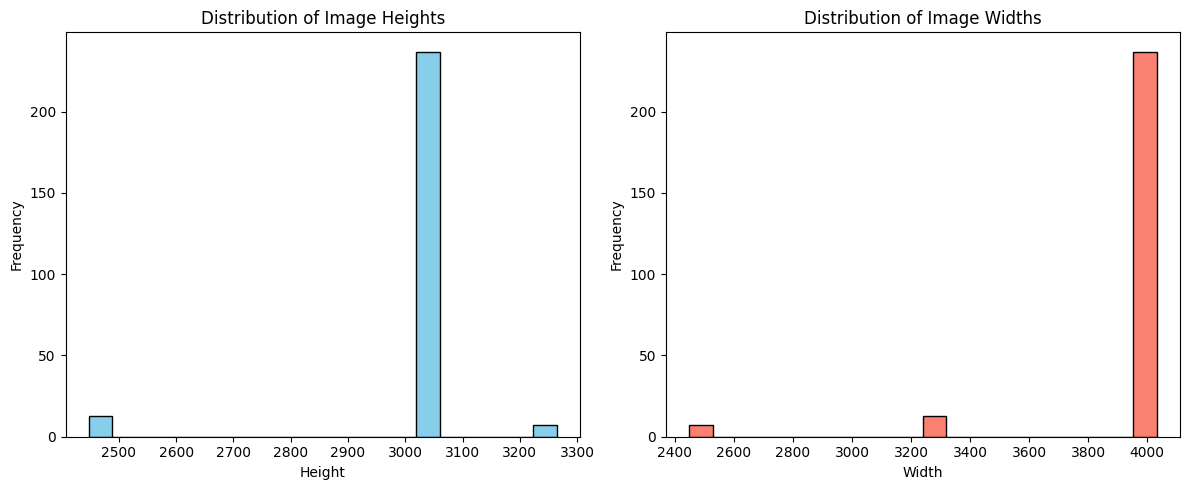

In [30]:

# Plot histogram of image widths and heights
heights, widths = zip(*image_dimensions)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Histogram of image heights
axs[0].hist(heights, bins=20, color='skyblue', edgecolor='black')
axs[0].set_title('Distribution of Image Heights')
axs[0].set_xlabel('Height')
axs[0].set_ylabel('Frequency')

# Histogram of image widths
axs[1].hist(widths, bins=20, color='salmon', edgecolor='black')
axs[1].set_title('Distribution of Image Widths')
axs[1].set_xlabel('Width')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


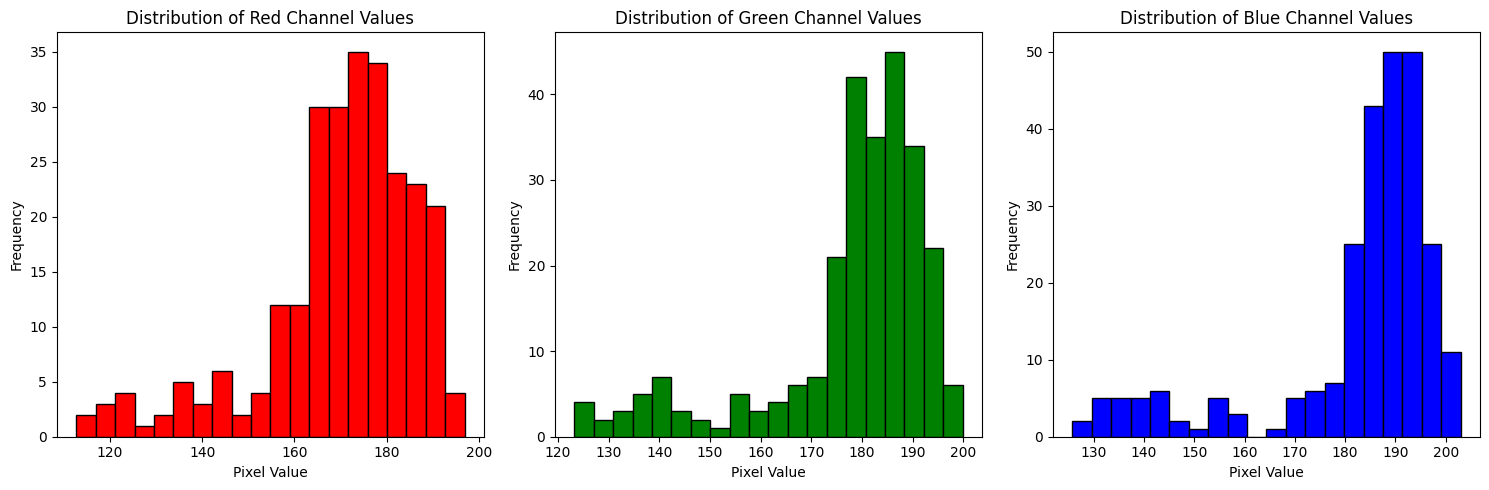

In [1]:
import os
import cv2
import matplotlib.pyplot as plt

# Path to the folder containing images
image_folder = '/content/drive/MyDrive/Dataset/dataset-ninja/concrete-crack-segmentation/ds/img'

# Get a list of image file names
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Load images
images = [cv2.imread(os.path.join(image_folder, f)) for f in image_files]

# Analyze distribution of pixel values in different color channels
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, color in enumerate(['Red', 'Green', 'Blue']):
    channel_values = [img[:, :, i].mean() for img in images]
    axs[i].hist(channel_values, bins=20, color=color.lower(), edgecolor='black')
    axs[i].set_title(f'Distribution of {color} Channel Values')
    axs[i].set_xlabel('Pixel Value')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


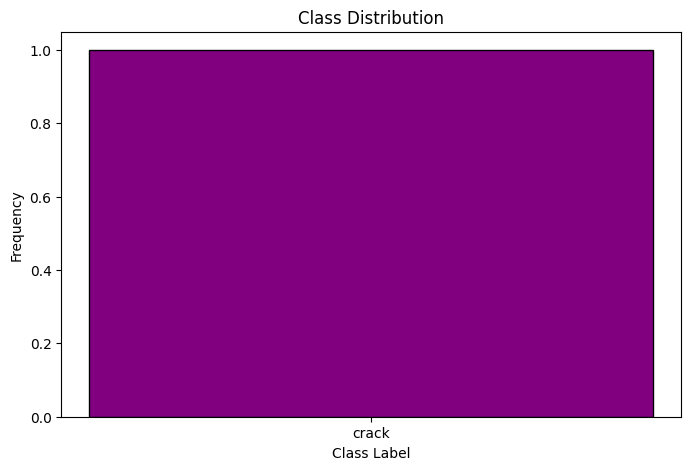

In [2]:
import json
import matplotlib.pyplot as plt

# Load JSON configuration file
json_config = '''
{
    "classes": [
        {
            "title": "crack",
            "shape": "bitmap",
            "color": "#BD10E0",
            "geometry_config": {},
            "id": 47714,
            "hotkey": ""
        }
    ],
    "tags": [],
    "projectType": "images"
}
'''

config_data = json.loads(json_config)

# Extract class information
classes = config_data.get("classes", [])
class_labels = [class_info.get("title") for class_info in classes]

# Plot class distribution
plt.figure(figsize=(8, 5))
plt.hist(class_labels, bins=len(set(class_labels)), color='purple', edgecolor='black')
plt.title('Class Distribution')
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.show()


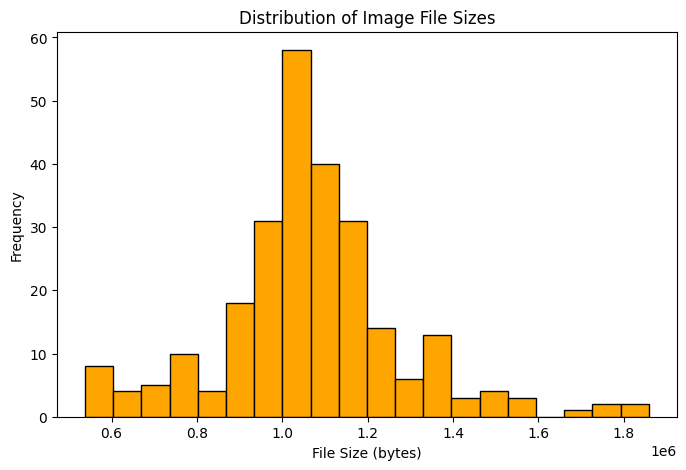

In [7]:
# Get file sizes
file_sizes = [os.path.getsize(os.path.join(image_folder, f)) for f in image_files]

# Plot file size distribution
plt.figure(figsize=(8, 5))
plt.hist(file_sizes, bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Image File Sizes')
plt.xlabel('File Size (bytes)')
plt.ylabel('Frequency')
plt.show()


In [2]:
import numpy as np

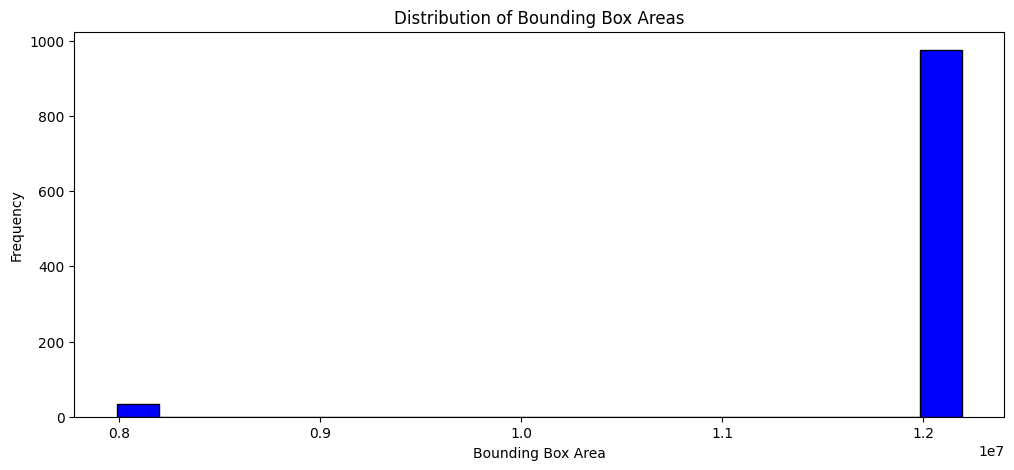

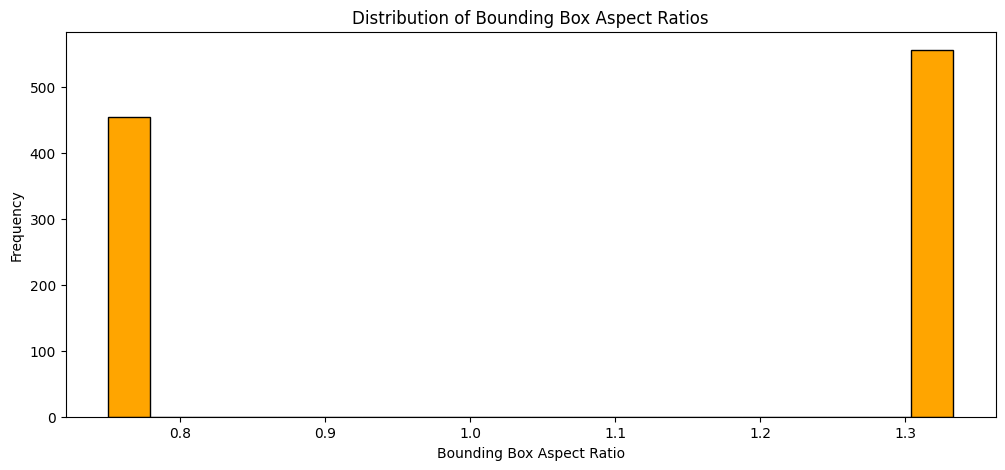

In [5]:
import json
import os
import matplotlib.pyplot as plt

# Path to the folder containing annotation files
annotation_folder = '/content/drive/MyDrive/Dataset/dataset-ninja/concrete-crack-segmentation/ds/ann'

# Lists to store bounding box information
bbox_areas = []
bbox_aspect_ratios = []

# Iterate over annotation files
for annotation_file in os.listdir(annotation_folder):
    if annotation_file.endswith('.json'):
        annotation_path = os.path.join(annotation_folder, annotation_file)

        # Load annotation data from JSON file
        with open(annotation_path, 'r') as json_file:
            try:
                annotation_data = json.load(json_file)
            except json.JSONDecodeError:
                print(f"Error loading JSON from file: {annotation_path}")
                continue

        # Extract bounding box information from "objects" key
        objects = annotation_data.get('objects', [])
        for obj_info in objects:
            # If obj_info is a string, convert it to a dictionary
            if isinstance(obj_info, str):
                try:
                    obj_info = json.loads(obj_info)
                except json.JSONDecodeError:
                    print(f"Error loading JSON from string in file: {annotation_path}")
                    continue

            bbox = obj_info.get('bitmap', {}).get('data', {})  # Adjust this based on your actual structure
            width, height = annotation_data['size']['width'], annotation_data['size']['height']

            # Calculate bounding box area and aspect ratio
            bbox_area = width * height
            bbox_aspect_ratio = width / height if height != 0 else 0

            bbox_areas.append(bbox_area)
            bbox_aspect_ratios.append(bbox_aspect_ratio)

# Plot histogram of bounding box areas
plt.figure(figsize=(12, 5))
plt.hist(bbox_areas, bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Bounding Box Areas')
plt.xlabel('Bounding Box Area')
plt.ylabel('Frequency')
plt.show()

# Plot histogram of bounding box aspect ratios
plt.figure(figsize=(12, 5))
plt.hist(bbox_aspect_ratios, bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Bounding Box Aspect Ratios')
plt.xlabel('Bounding Box Aspect Ratio')
plt.ylabel('Frequency')
plt.show()


Data spliting

In [10]:
import os
from sklearn.model_selection import train_test_split

# Paths to the folder containing images
image_folder = '/content/drive/MyDrive/Dataset/dataset-ninja/concrete-crack-segmentation/ds/img'

# List files in the image folder
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Split data into training and validation sets
train_images, val_images = train_test_split(image_files, test_size=0.2, random_state=42)

# Print the number of files in each set
print(f"Number of training images: {len(train_images)}")
print(f"Number of validation images: {len(val_images)}")

# Save the split information to files if needed
with open('train_images.txt', 'w') as train_img_file:
    train_img_file.write('\n'.join(train_images))

with open('val_images.txt', 'w') as val_img_file:
    val_img_file.write('\n'.join(val_images))


Number of training images: 205
Number of validation images: 52
